In [1]:
# import libraries
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# differencing with first frame as reference
def ICV_DIFFERENCE1(img_sequence):
    # define reference frame as first frame
    reference = img_sequence[0]
    height = len(reference)
    width = len(reference[0])

    # list to store results
    results = []

    # loop through frames in image sequence    
    for frame in img_sequence:
        # list to store difference of each frame
        difference = [[0 for _ in range(width)] for _ in range(height)]
        # iterate through pixels of each frame
        for x in range(height):
            for y in range(width):
                # calculate difference
                difference[x][y] = abs(frame[x][y] - reference[x][y])
        results.append(difference)

    return results

In [3]:
# differencing with threshold with first frame as reference
def ICV_DIFFERENCE_THRESHOLD1(img_sequence, threshold):
    # define reference frame as first frame
    reference = img_sequence[0]
    height = len(reference)
    width = len(reference[0])

    # list to store results
    results = []

    # loop through frames in image sequence    
    for frame in img_sequence:
        # list to store binary result of each frame
        binary_result = [[0 for _ in range(width)] for _ in range(height)]
        # iterate through pixels of each frame
        for x in range(height):
            for y in range(width):
                # calculate difference
                difference = abs(frame[x][y] - reference[x][y])
                # compare to threshold and assign 0 or 1
                binary_result[x][y] = 1 if difference > threshold else 0
        results.append(binary_result)

    return results

In [4]:
# differencing with previous frame as reference
def ICV_DIFFERENCE2(img_sequence):
    # define reference frame as first frame
    reference = img_sequence[0]
    height = len(reference)
    width = len(reference[0])

    # list to store results
    results = []

    # loop through frames in image sequence    
    for i in range(1, len(img_sequence)):
        frame = img_sequence[i]
        # list to store difference of each frame
        difference = [[0 for _ in range(width)] for _ in range(height)]
        # iterate through pixels of each frame
        for x in range(height):
            for y in range(width):
                # calculate difference
                difference[x][y] = abs(frame[x][y] - reference[x][y])
        results.append(difference)

        # change reference to previous frame
        reference = frame

    return results

In [5]:
# differencing with threshold with previous frame as reference
def ICV_DIFFERENCE_THRESHOLD2(img_sequence, threshold):
    # define reference frame as first frame
    reference = img_sequence[0]
    height = len(reference)
    width = len(reference[0])

    # list to store results
    results = []

    # loop through frames in image sequence    
    for i in range(1, len(img_sequence)):
        frame = img_sequence[i]
        # list to store binary result of each frame
        binary_result = [[0 for _ in range(width)] for _ in range(height)]
        # iterate through pixels of each frame
        for x in range(height):
            for y in range(width):
                # calculate difference
                difference = abs(frame[x][y] - reference[x][y])
                # compare to threshold and assign 0 or 1
                binary_result[x][y] = 1 if difference > threshold else 0
        results.append(binary_result)

        # change reference to previous frame
        reference = frame

    return results

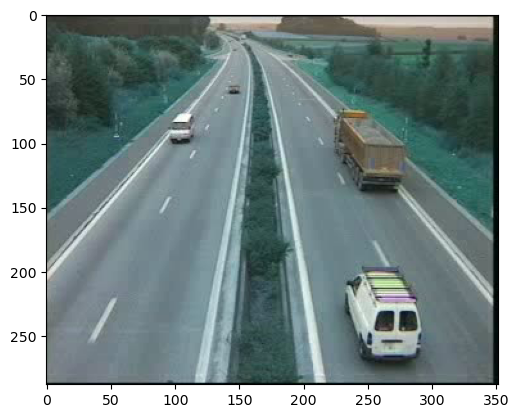

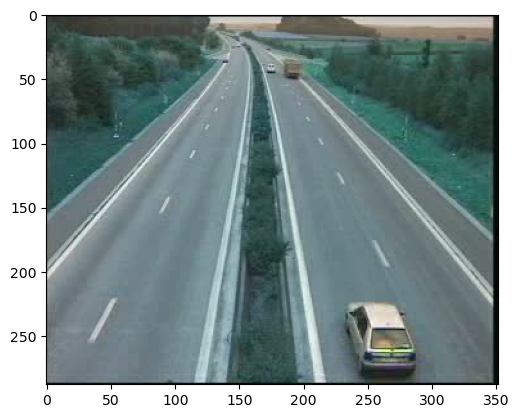

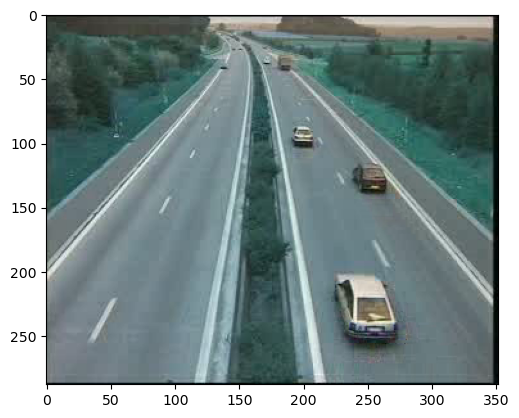

In [6]:
import random
# open video file
video = cv2.VideoCapture('DatasetC.mpg')

# extract frames
frame_num = 0

# calculate number of frames
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

# create frame list
frames = []

# show 2 random frames
random_frames = [random.randint(0, total_frames-1) for _ in range(2)]
i = random_frames[0]
j = random_frames[1]

while video.isOpened() and frame_num < total_frames:
    ret, frame = video.read()
    if not ret:
        break

    if frame_num == 0 or frame_num == i or frame_num == j:
        plt.imshow(frame)
        plt.show()

    # convert frames to rgb
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_list = frame.tolist()
    frames.append(frame_list)

    frame_num += 1

# release video object
video.release()
cv2.destroyAllWindows()

In [7]:
# define threshold
threshold = 30
# perform differencing on frames
results1 = ICV_DIFFERENCE1(frames)
results_threshold1 = ICV_DIFFERENCE_THRESHOLD1(frames, threshold)
results2 = ICV_DIFFERENCE2(frames)
results_threshold2 = ICV_DIFFERENCE_THRESHOLD2(frames, threshold)

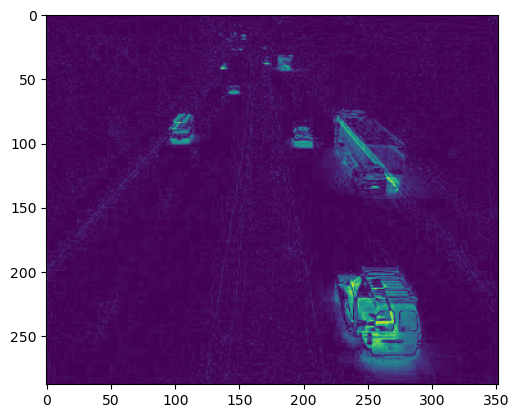

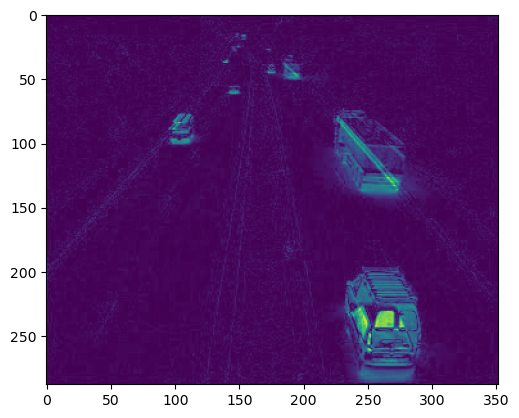

In [8]:
plt.imshow(results1[i])
plt.show()
plt.imshow(results1[j])
plt.show()

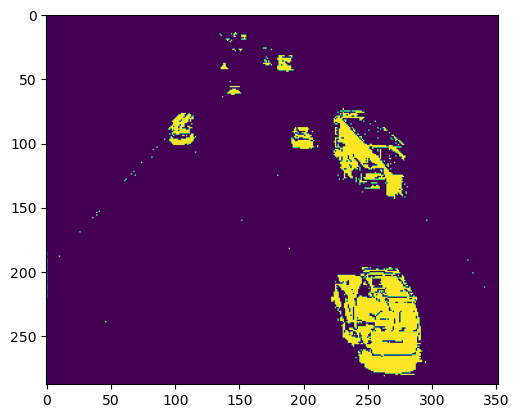

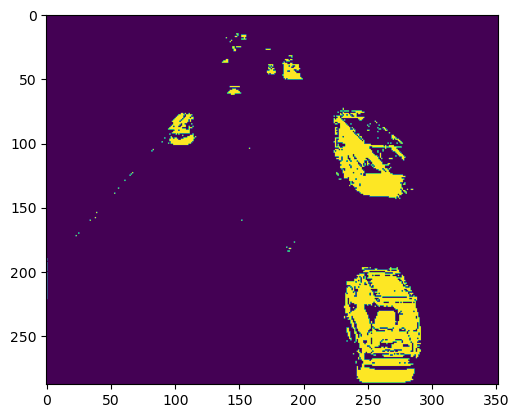

In [9]:
plt.imshow(results_threshold1[i])
plt.show()
plt.imshow(results_threshold1[j])
plt.show()

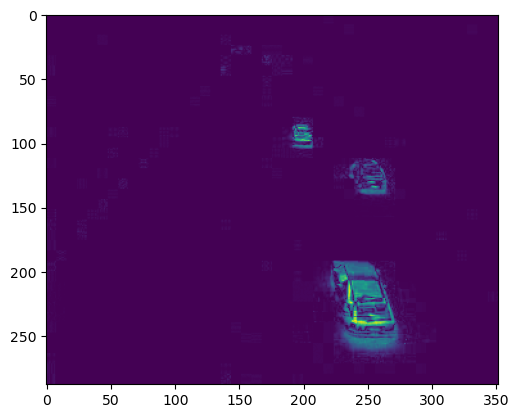

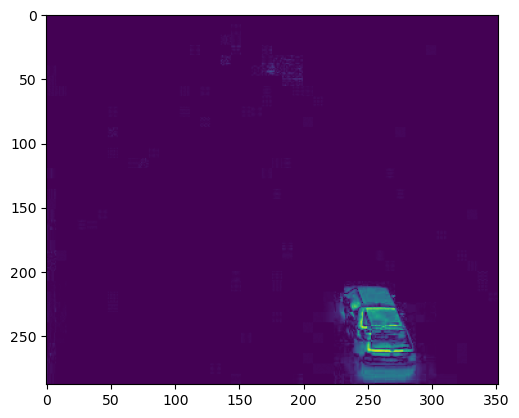

In [10]:
plt.imshow(results2[i])
plt.show()
plt.imshow(results2[j])
plt.show()

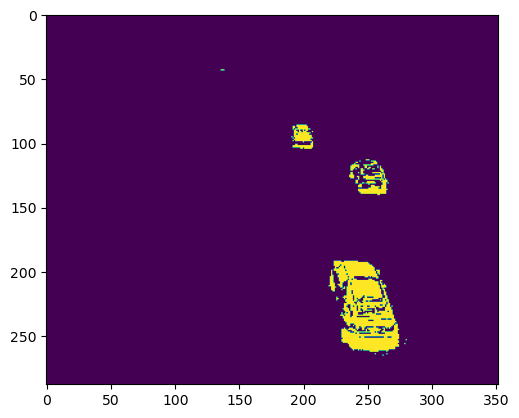

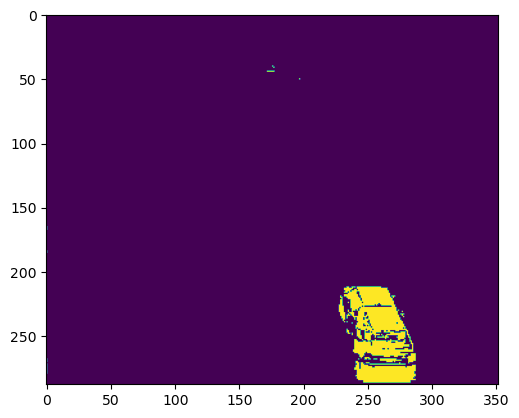

In [11]:
plt.imshow(results_threshold2[i])
plt.show()
plt.imshow(results_threshold2[j])
plt.show()

In [12]:
# function to generate reference frame
def ICV_REF(img_sequence, alpha):
    # define reference
    height = len(img_sequence[0])
    width = len(img_sequence[0][0])
    reference = [[0 for w in range(width)] for h in range(height)]

    # iterate through frames of image sequence
    for i in range(1, len(img_sequence)):
        frame = img_sequence[i]
        
        # iterate through pixels
        for x in range(height):
            for y in range(width):
                # compute weighted average
                reference[x][y] = (1 - alpha) * reference[x][y] + alpha * frame[x][y]

    return reference

In [13]:
# define alpha
alpha = 0.1
# generate reference
reference = ICV_REF(frames, alpha)

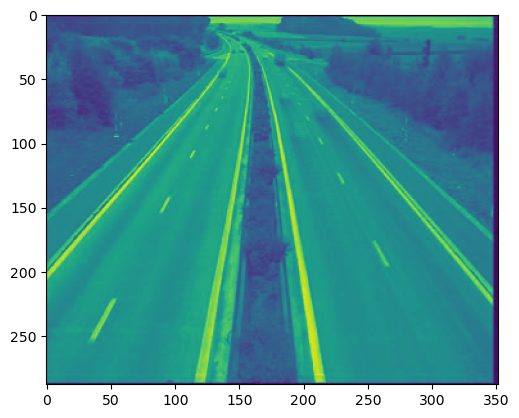

In [14]:
plt.imshow(reference)
plt.show()

In [15]:
# differencing with threshold with first frame as reference
def ICV_DIFFERENCE_BACKGROUND(img_sequence, background, threshold):
    # define height and width
    height = len(reference)
    width = len(reference[0])

    # list to store results
    results = []

    # loop through frames in image sequence    
    for frame in img_sequence:
        # list to store binary result of each frame
        binary_result = [[0 for _ in range(width)] for _ in range(height)]
        # iterate through pixels of each frame
        for x in range(height):
            for y in range(width):
                # calculate difference
                difference = abs(frame[x][y] - background[x][y])
                # compare to threshold and assign 0 or 1
                binary_result[x][y] = 1 if difference > threshold else 0
        results.append(binary_result)

    return results

In [16]:
results3 = ICV_DIFFERENCE_BACKGROUND(frames, reference, threshold)

In [17]:
def ICV_OBJECTS(binary_frames):
    # list to gold object counts of each frame
    object_counts = []
    # iterate through frames
    for binary_frame in binary_frames:
        # define height and width
        height = len(binary_frame)
        width = len(binary_frame[0])
        # define grid
        grid_rows = height // 36
        grid_cols = width // 20
        # variable for object count
        count = 0
        # iterate through grid
        for i in range(grid_rows):
            for j in range(grid_cols):
                # count number of ones in each grid
                cell_count = 0
                for x in range(i * 10, min((i + 1) * 10, height)):
                    for y in range(j * 10, min((j + 1) * 10, width)):
                        cell_count += binary_frame[x][y]
                # if there are more than a certain number of ones in the grid, we have a moving object
                min_pixels = 20
                if cell_count >= min_pixels:
                    count += 1

        object_counts.append(count)
    return object_counts

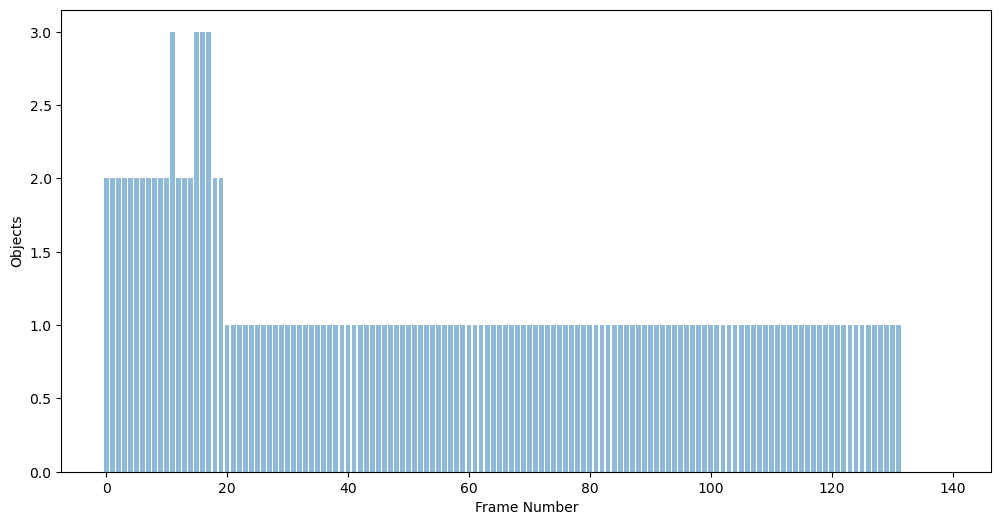

In [18]:
objs = ICV_OBJECTS(results3)
frame_nums = np.arange(len(objs))
plt.figure(figsize=(12, 6))
plt.bar(frame_nums, objs, alpha=0.5)
plt.xlabel("Frame Number")
plt.ylabel("Objects")
plt.show()